In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<b> collected from : https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [50]:
crop = pd.read_csv("Crop_recommendation.csv")

In [51]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<pre>
    <b> 
- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm
- label = crop type </b></pre>

In [52]:
crop.shape # Rows = 2200 , Cols=8

(2200, 8)

In [53]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [54]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [55]:
crop.duplicated().sum()

0

In [56]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [57]:
# Check for non-numeric columns
non_numeric_columns = crop.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['label'], dtype='object')


In [58]:
# Drop non-numeric columns (in this case, 'label')
df_numeric = crop.drop(columns=non_numeric_columns)

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


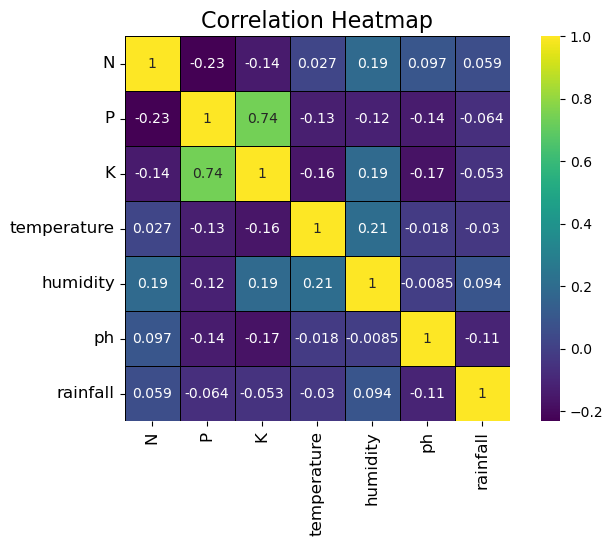

In [59]:
# Plot the correlation heatmap 
plt.figure(figsize=(8, 5)) 
sns.heatmap(corr_matrix, annot=True, cbar=True, cmap='viridis', linewidths=0.5, linecolor='black', square=True)
plt.title('Correlation Heatmap', fontsize=16) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

In [60]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

#### <b> Multiclass Classification

In [61]:
crop['label'].unique().size # 22 different type crops

22

## <b> Checking The Distribution of Data

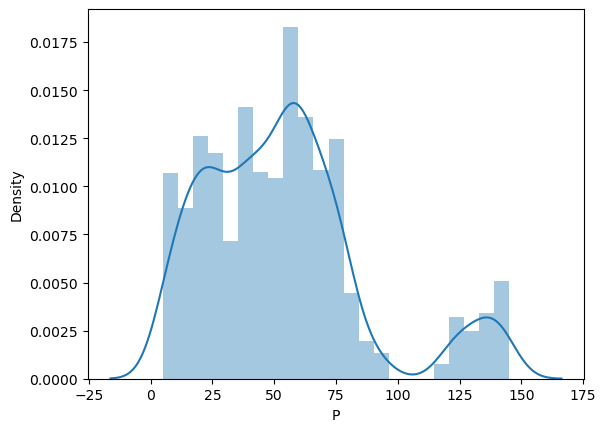

In [62]:
import matplotlib.pyplot as plt
sns.distplot(crop['P']) # Data is Right Skewed not Normally Distributeed
plt.show()

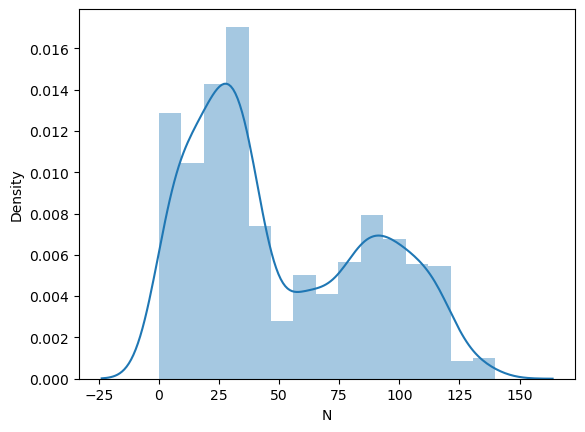

In [63]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [64]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [65]:
label_dict={ 
             'rice': 1, 
             'maize': 2, 
             'jute': 3, 
             'cotton': 4, 
             'coconut': 5, 
             'papaya': 6, 
             'orange': 7, 
              'apple': 8, 
              'muskmelon': 9, 
              'watermelon': 10, 
               'grapes': 11, 
                'mango': 12, 
                'banana': 13, 
                'pomegranate': 14, 
                'lentil': 15, 
                 'blackgram': 16, 
                 'mungbean': 17, 
                 'mothbeans': 18, 
                  'pigeonpeas': 19, 
                  'kidneybeans': 20,
                  'chickpea': 21, 
                  'coffee': 22
           }

crop['label'] = crop['label'].map(label_dict)

In [66]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [67]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22], dtype=int64)

In [68]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

### <b> Selecting Dependent and Independent Features

In [69]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [70]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [71]:
y.iloc[500:800].sample(10)

621    17
652    17
605    17
709    16
730    16
620    17
733    16
602    17
691    17
731    16
Name: label, dtype: int64

## <b> Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [73]:
X_train.shape

(1540, 7)

<b> As we have seen the Distribution of Data Is Skewed So We Need Scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [75]:
X_train

array([[0.66428571, 0.36428571, 0.185     , ..., 0.79286804, 0.60139069,
        0.62809041],
       [0.58571429, 0.14285714, 0.23      , ..., 0.85409209, 0.3970277 ,
        0.09975723],
       [0.02857143, 0.00714286, 0.01      , ..., 0.89659546, 0.49614872,
        0.33182524],
       ...,
       [0.25      , 0.42142857, 0.05      , ..., 0.574846  , 0.46354806,
        0.17673404],
       [0.27857143, 0.42857143, 0.09      , ..., 0.64005645, 0.64874237,
        0.0742876 ],
       [0.1       , 0.12142857, 0.02      , ..., 0.89682976, 0.4702709 ,
        0.33123294]])

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [77]:
X_train

array([[ 1.14295117,  0.07426578, -0.11877493, ...,  0.49180205,
         1.19711643,  1.671109  ],
       [ 0.84664863, -0.86120868,  0.05768777, ...,  0.72843122,
        -0.5276221 , -0.99847544],
       [-1.2544057 , -1.43456399, -0.80501879, ...,  0.8927055 ,
         0.30891807,  0.17412772],
       ...,
       [-0.41937128,  0.31567854, -0.64816305, ..., -0.35084672,
         0.03378207, -0.60952373],
       [-0.31162491,  0.34585513, -0.49130731, ..., -0.09881027,
         1.5967449 , -1.12716949],
       [-0.98503976, -0.95173846, -0.76580486, ...,  0.89361106,
         0.09051998,  0.17113492]])

In [78]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier 
from sklearn.metrics import accuracy_score 

In [79]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [80]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

Logistic Regression model with accuracy: 0.9606060606060606
Naive Bayes model with accuracy: 0.9939393939393939
SVC model with accuracy: 0.9833333333333333
KNN model with accuracy: 0.9757575757575757
Decision Tree model with accuracy: 0.9803030303030303
Random Forest model with accuracy: 0.9954545454545455
Bagging model with accuracy: 0.9893939393939394
AdaBoost model with accuracy: 0.21212121212121213


## <b> Model Selection

In [81]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9939393939393939

In [82]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [83]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = rf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [84]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [85]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [86]:
N=90
P= 80
K= 41
temperature= 21.770462
humidity=89.319644
ph= 8.038096
rainfall=226.655537	

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [87]:
predict # array[6] = Papaya

array([6], dtype=int64)

# Saving the Best Model

In [88]:
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))